In [1]:
import re
import uproot
import ROOT
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Welcome to JupyROOT 6.24/09


In [2]:
# o stands for "old"
ofname = "../TuningFile/11_tr.root"
fname  = "../TuningFile/cprofiles_merged.root"

of = uproot.open(ofname)
f  = uproot.open(fname)

In [11]:
energy = 120.0

oh, othbins, osbins = of[f"g_11_{int(energy)}"].to_numpy()
h ,  thbins, sbins  =  f[f"g_{energy}"]        .to_numpy()

np.testing.assert_allclose(othbins, thbins)
np.testing.assert_allclose( osbins, sbins)
np.testing.assert_allclose( oh, h)

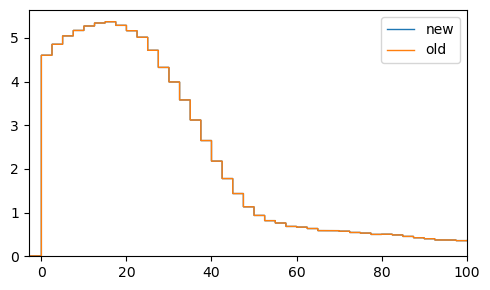

In [16]:
# s projections 
plt.figure(figsize=[5, 3])

plt.stairs( h.sum(axis=0),  sbins, label="new")
plt.stairs(oh.sum(axis=0), osbins, label="old")

plt.xlim([-3, 100])
plt.legend()
plt.tight_layout()

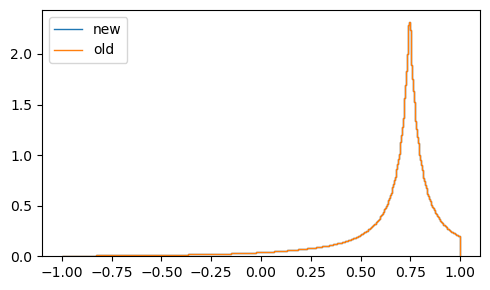

In [14]:
# th projections 
plt.figure(figsize=[5, 3])

plt.stairs( h.sum(axis=1),  thbins, label="new")
plt.stairs(oh.sum(axis=1), othbins, label="old")


plt.legend()
plt.tight_layout()